## Subplots 
- Multiple plots on one figure https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

(array([ 13.,  38.,  87., 148., 215., 183., 165.,  91.,  40.,  20.]),
 array([-2.80940751, -2.24884736, -1.6882872 , -1.12772705, -0.5671669 ,
        -0.00660675,  0.55395341,  1.11451356,  1.67507371,  2.23563387,
         2.79619402]),
 <a list of 10 Patch objects>)

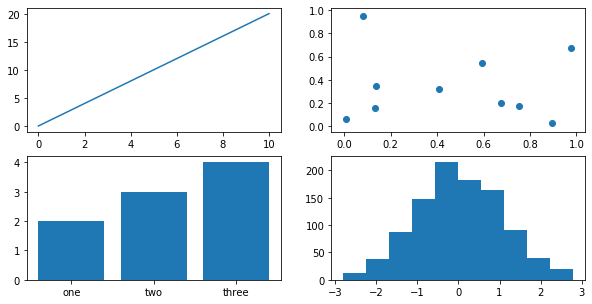

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
# Option 1 : Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))
# Plot data in each axis
x= np.linspace(0,10,100)
ax1.plot(x,x*2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(["one","two","three"],[2,3,4])
ax4.hist(np.random.randn(1000))

## 3. Plotting data directly with pandas DataFrames

In [13]:
import pandas as pd

In [15]:
# MAke a dataframe
car_sales = pd.read_csv("data/car_sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Line

-DataFrame



In [16]:
# Dummy data
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020',periods =1000))
ts

2020-01-01   -1.168841
2020-01-02    0.208950
2020-01-03   -0.124248
2020-01-04   -1.175747
2020-01-05   -0.855677
                ...   
2022-09-22   -0.174682
2022-09-23    0.615567
2022-09-24   -0.539656
2022-09-25   -0.619779
2022-09-26    0.057295
Freq: D, Length: 1000, dtype: float64

In [17]:
# What does cumsum() do?
ts.cumsum()

2020-01-01     -1.168841
2020-01-02     -0.959891
2020-01-03     -1.084140
2020-01-04     -2.259887
2020-01-05     -3.115563
                 ...    
2022-09-22   -100.751573
2022-09-23   -100.136007
2022-09-24   -100.675663
2022-09-25   -101.295442
2022-09-26   -101.238147
Freq: D, Length: 1000, dtype: float64

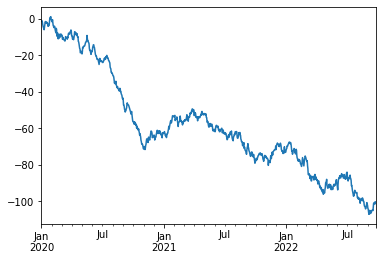

In [18]:
ts.cumsum().plot();

### Working with actual data 

Data manipulation on car_sales DataFrame.

In [21]:
# removing symbols
car_sales['Price']= car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [22]:
# Removing last two zeros
car_sales["Price"]=car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [23]:
#Adding a date column
car_sales['sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [24]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total sales"] = car_sales["Price"].cumsum()

# Converting into string
car_sales["Total sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,sale Date,Total sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


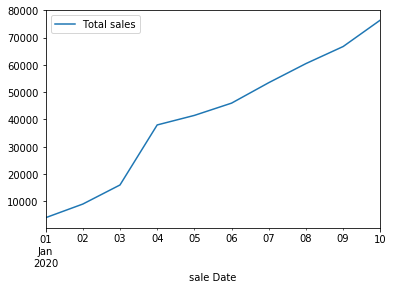

In [26]:
car_sales.plot(x = 'sale Date', y = 'Total sales');

### SCatter plot 
- Concept
- DataFrame

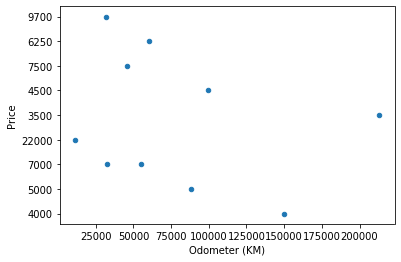

In [27]:
# Doesn't work
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

##  Bar 
- Concept
- DataFrame

In [28]:
x = np.random.rand(10,4)
x 

array([[0.9803954 , 0.86491133, 0.04852833, 0.4650951 ],
       [0.64481827, 0.76892119, 0.24207742, 0.84056557],
       [0.60528659, 0.18675185, 0.16728501, 0.72637923],
       [0.08807413, 0.11421462, 0.09764196, 0.74290255],
       [0.41664145, 0.04374111, 0.53997601, 0.06621214],
       [0.06462756, 0.97970574, 0.33275769, 0.38452832],
       [0.13408763, 0.27105968, 0.5560367 , 0.24407016],
       [0.35595541, 0.97497761, 0.2597751 , 0.62809829],
       [0.61179177, 0.59575097, 0.84206157, 0.76695459],
       [0.76625167, 0.06233084, 0.18613279, 0.1427595 ]])

In [29]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.980395,0.864911,0.048528,0.465095
1,0.644818,0.768921,0.242077,0.840566
2,0.605287,0.186752,0.167285,0.726379
3,0.088074,0.114215,0.097642,0.742903
4,0.416641,0.043741,0.539976,0.066212
5,0.064628,0.979706,0.332758,0.384528
6,0.134088,0.271060,0.556037,0.244070
7,0.355955,0.974978,0.259775,0.628098
8,0.611792,0.595751,0.842062,0.766955
9,0.766252,0.062331,0.186133,0.142759


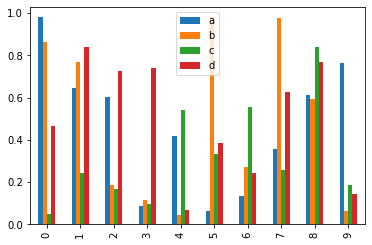

In [30]:
df.plot.bar(); 

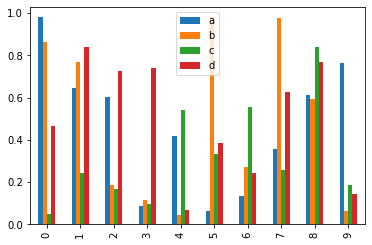

In [31]:
df.plot(kind='bar');

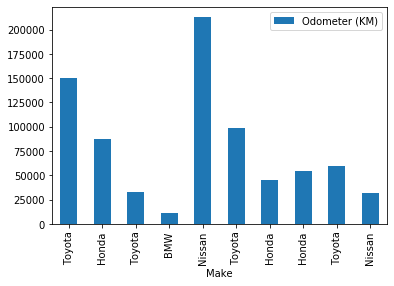

In [32]:
car_sales.plot(x='Make',y='Odometer (KM)', kind ='bar')

## Histograms 

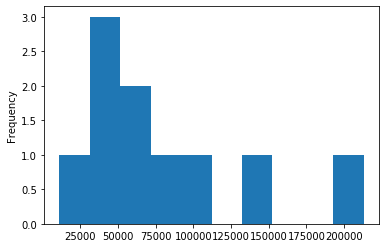

In [33]:
car_sales["Odometer (KM)"].plot.hist()